## Final Project Submission

Please fill out:
* Student name: Eugene Kuloba
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

## Business Understanding

A business problem you could focus on for this stakeholder is the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

In [1]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load DataFrame
df =  pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Understanding

In [3]:
# DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# No of columns
print('DataFrame has',len(df.columns),'columns')
df.columns

DataFrame has 21 columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# Number of rows
df.shape
print('DataFrame has',df.shape[0], 'rows')

DataFrame has 21597 rows


In [6]:
# Find Missing values
df.isna().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
# Find duplicates
df.duplicated().any()

False

In [8]:
# Data Summaryi
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html("./report.html")


                                             |          | [  0%]   00:00 -> (? left)

Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Univariate Analysis

In [10]:
plt.style.use('ggplot')

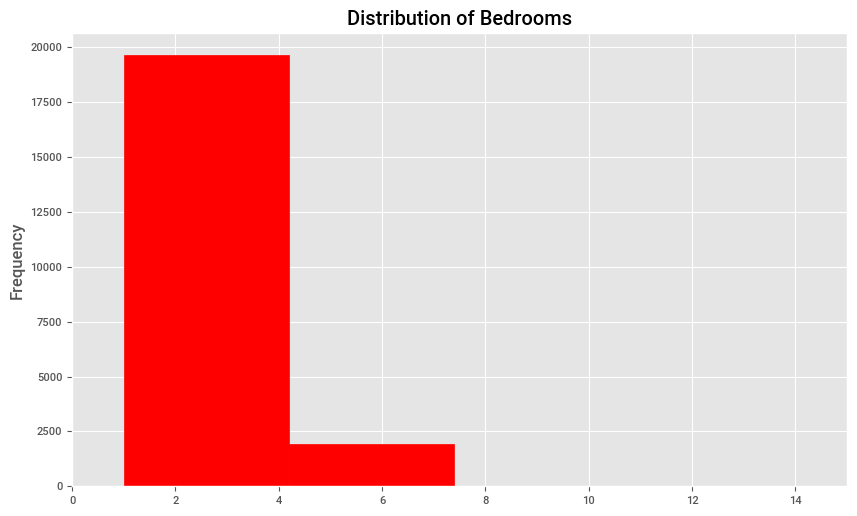

In [11]:
# Distribution of bedrooms 
fig,ax=plt.subplots(figsize=(10,6))
df['bedrooms'].plot.hist(ax = ax, edgecolor='red',color='red')
ax.set_title('Distribution of Bedrooms')
ax.set_xlim([0,15])
plt.show();


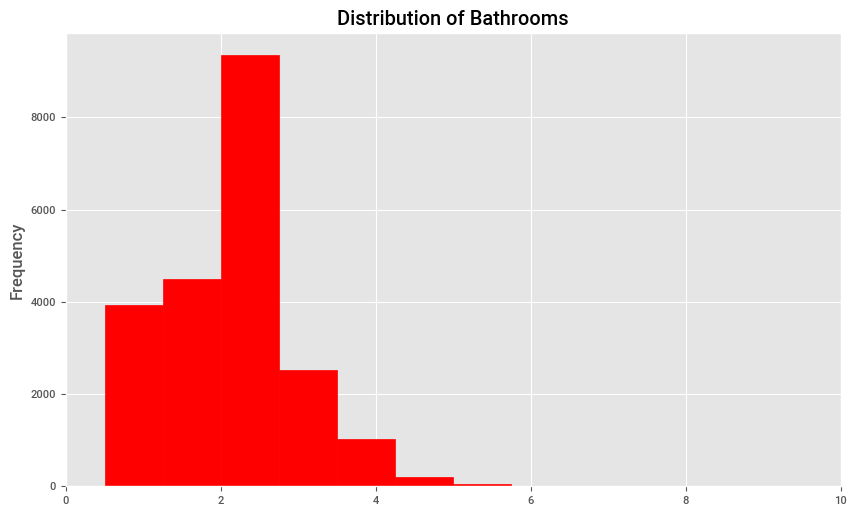

In [12]:
# Distribution of bathrooms
fig,ax=plt.subplots(figsize=(10,6))
df['bathrooms'].plot.hist(ax = ax, edgecolor='red',color='red')
ax.set_title('Distribution of Bathrooms')
ax.set_xlim([0, 10])
plt.show();


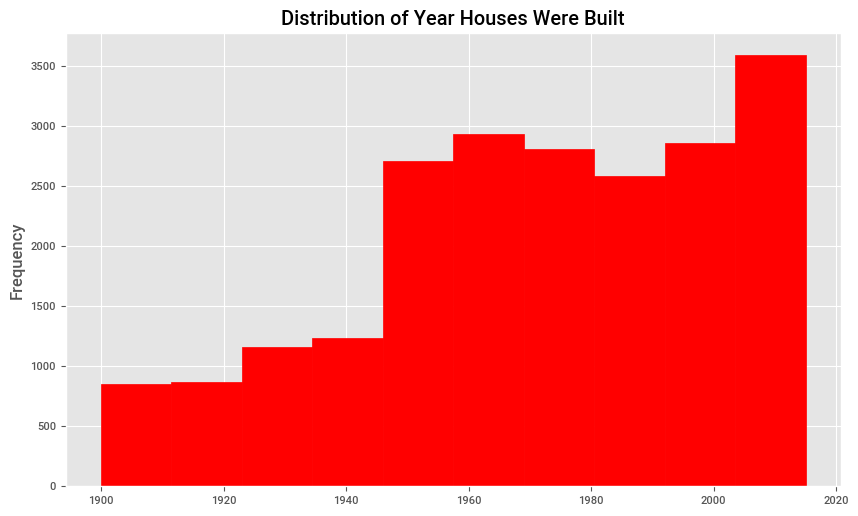

In [13]:
# Distribution of Year houses Were Built
fig,ax=plt.subplots(figsize=(10,6))
df['yr_built'].plot.hist(ax = ax, edgecolor='red',color='red')
ax.set_title('Distribution of Year Houses Were Built')
plt.show();

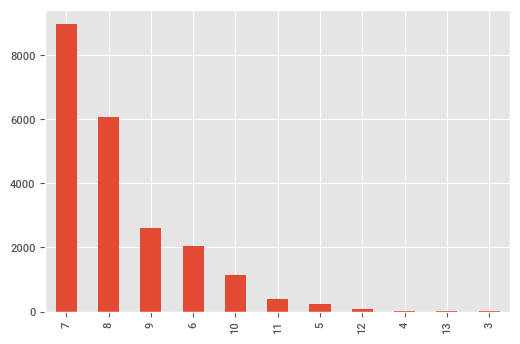

In [14]:
#Grade
df.grade.value_counts().plot.bar();

Large number of people tend to buy houses with a grade of 7 and this may be beacuse they are probably cheaper and good to live in.

c:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


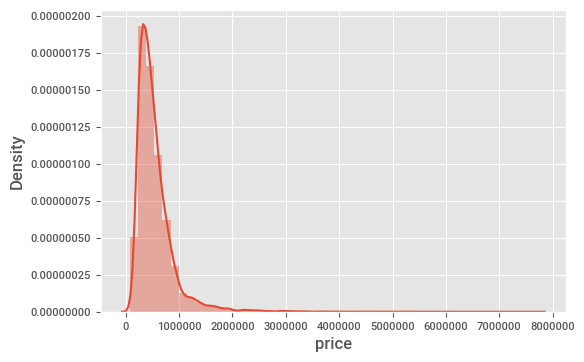

In [15]:
sns.distplot(df.price);

The price is positively skewed.

## Bivariate Analysis

In [16]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

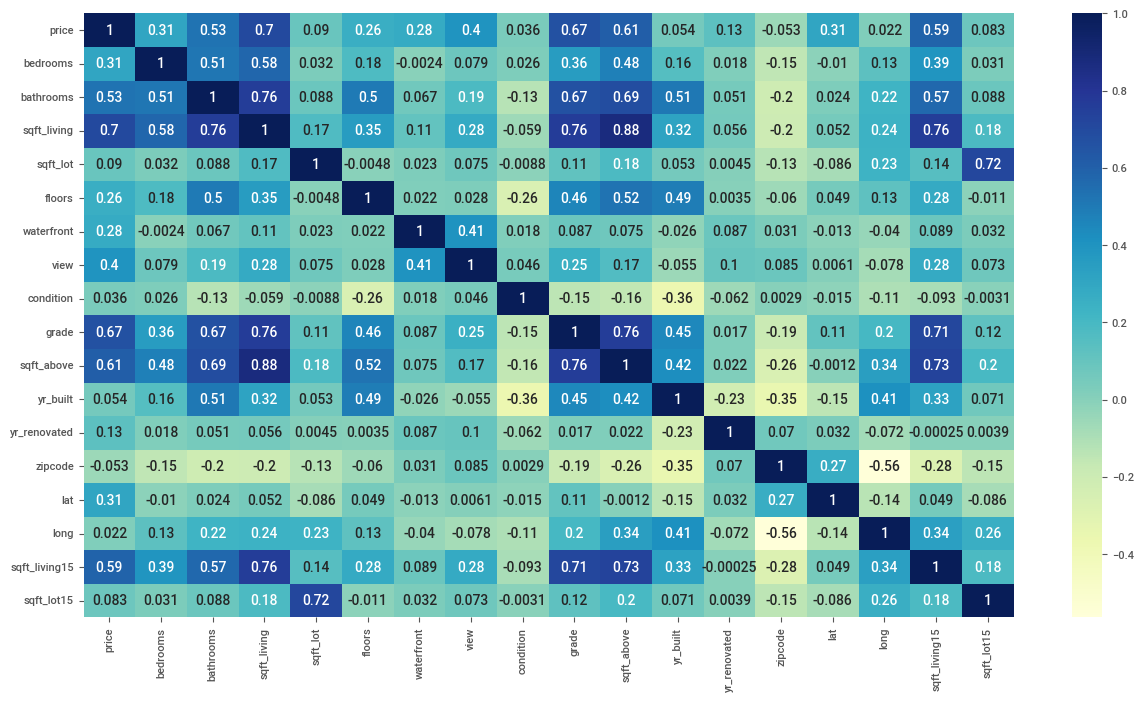

In [17]:
# Heatmap to show the corr values
plt.figure(figsize=(15,8))
sns.heatmap(df.drop('id',axis=1).corr(), annot=True, cmap = 'YlGnBu');
plt.show()

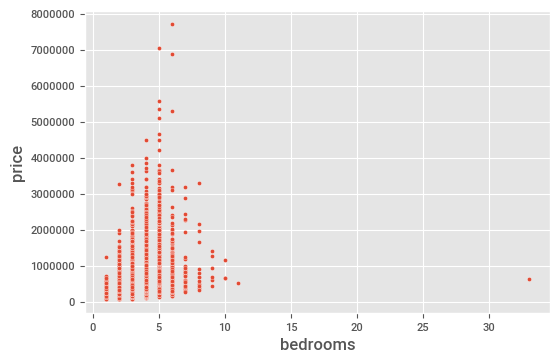

In [18]:
# Scatter Plot Between Price And No of Bedrooms
sns.scatterplot(data=df, x="bedrooms", y="price");

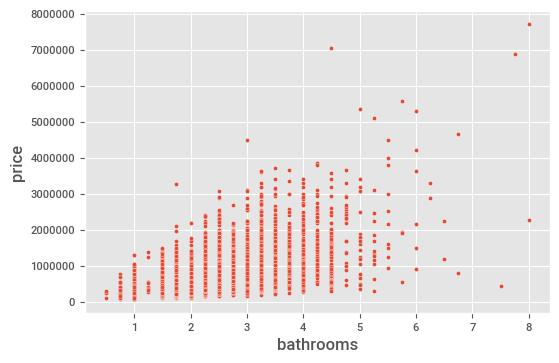

In [19]:
# Scatter Plot Between Price And No of Bathrooms
sns.scatterplot(data=df, x="bathrooms", y="price");

From the visualization above we can see a positive linear relationship. An increase in the number of bathrooms leads to an increase in the price of the house.

<AxesSubplot:xlabel='grade', ylabel='price'>

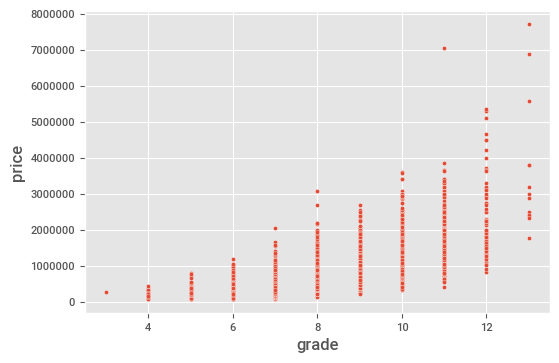

In [20]:
# Scatter Plot Between Price And Grade
sns.scatterplot(data=df, x="grade", y="price")

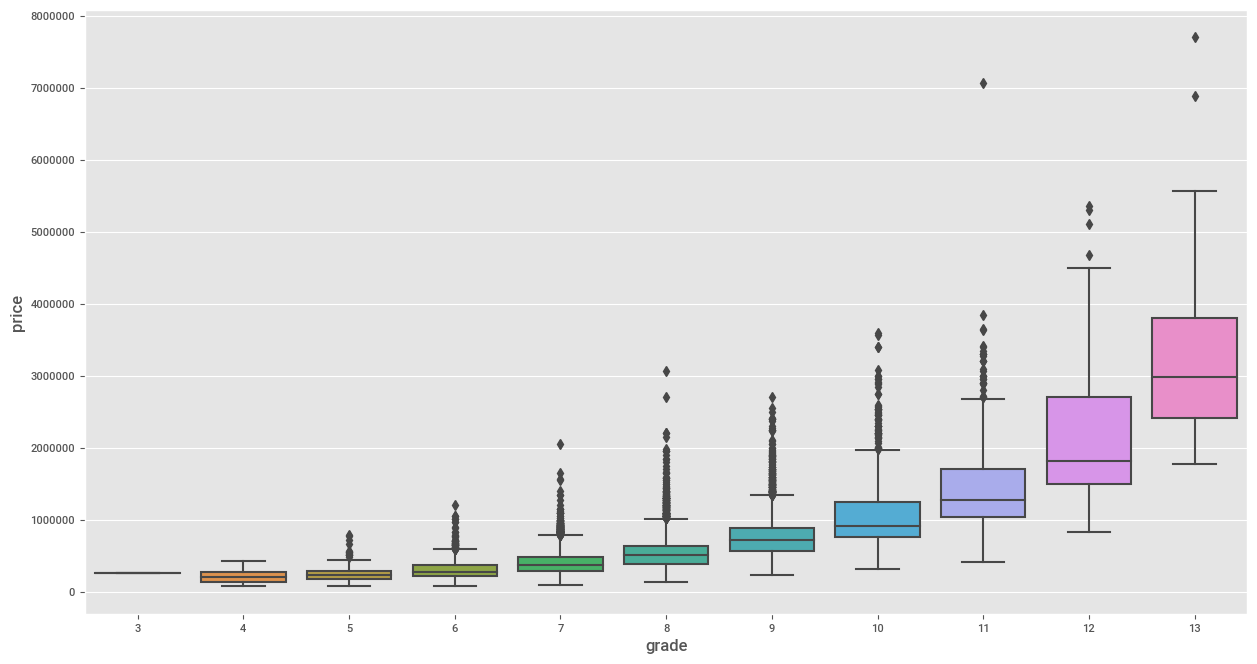

In [21]:
#box plot grade and price
data = pd.concat((df.price, df.grade), axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x='grade', y="price", data=data);

From the boxplot and scatterplot between price and grade we can also see a linear relationship. Houses with higher grades have higher prices whereas those with lower grade have lower prices.

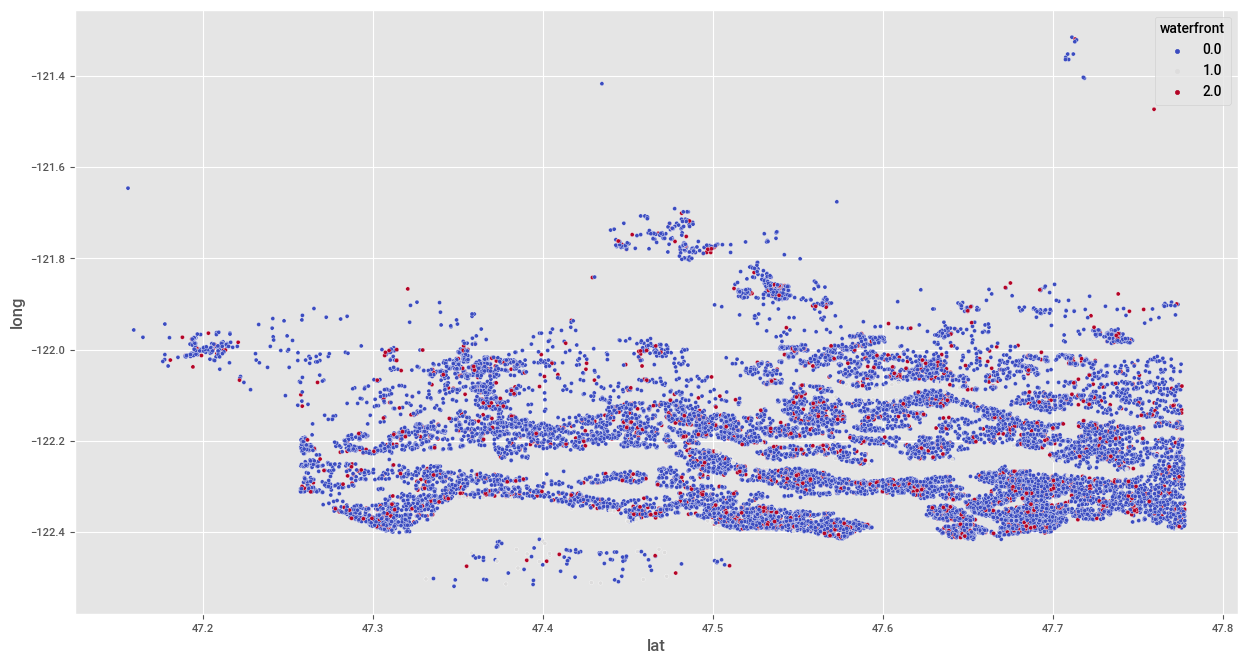

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='lat',y='long',data=df,hue='waterfront',palette='coolwarm');

## Data Preparation

In [23]:
# Display Data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [24]:
# missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [25]:
# Percentage of Missing Values
df.isnull().sum()/len(df)* 100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

<AxesSubplot:>

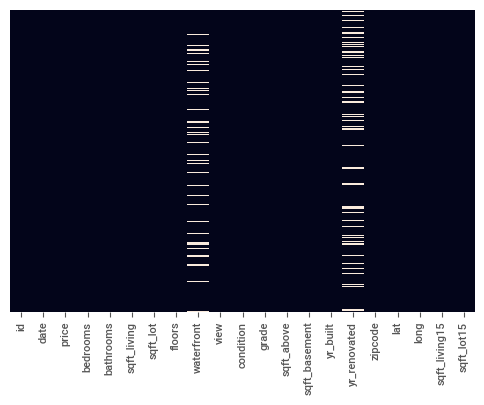

In [26]:
# Heatmap to see missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [28]:
# Handling Missing values
df.waterfront.unique()

array([nan,  0.,  1.])

In [29]:
# Replace nan in waterfront column with one variable (2)
df['waterfront'].fillna(2,inplace=True)
df.waterfront.unique()


array([2., 0., 1.])

In [30]:
# Drop yr_renovated
df.dropna(inplace = True)

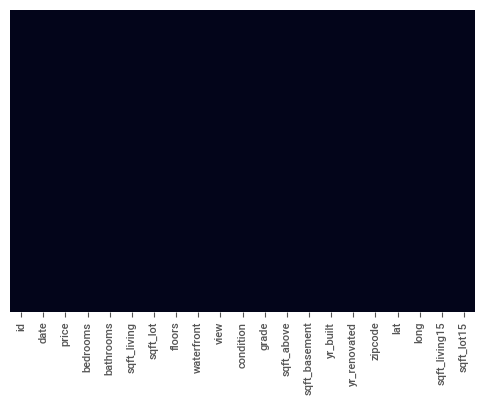

In [32]:
# Heatmap to see missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False);

There is no missing values

Text(0.5, 1.0, 'Prices')

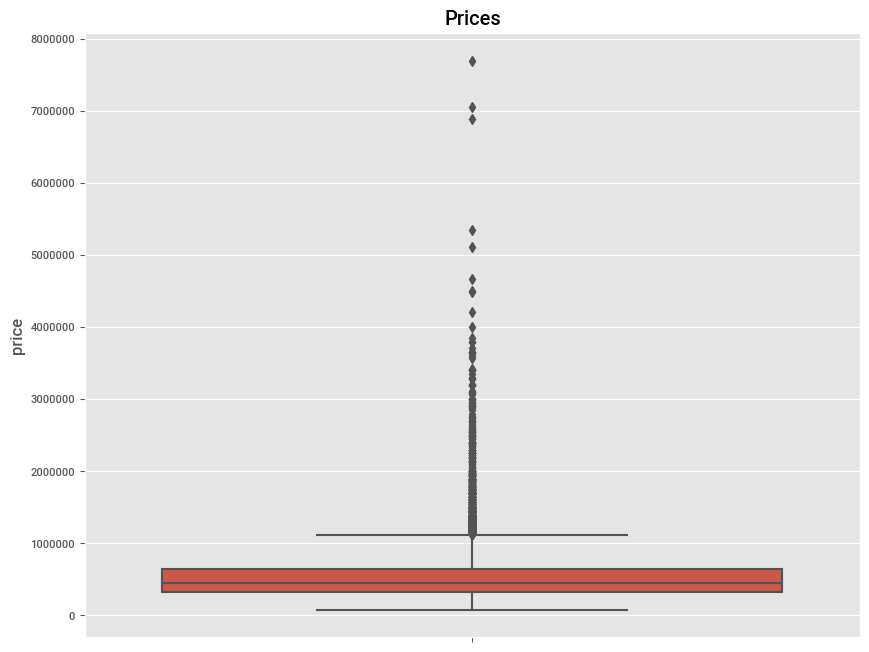

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, y = "price", ax=ax)
ax.set_title('Prices')

Outliers are alot and if removed may tamper with accuracy of the data hence I decided not to remove them

## Stats on Price

In [34]:
price_stats = df['price'].describe()
price_stats

count    1.770400e+04
mean     5.403686e+05
std      3.676424e+05
min      8.000000e+04
25%      3.218375e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [35]:
# Correlation of price
df.corr()[['price']].sort_values(by='price',ascending=False)

,price
price,1.000000
sqft_living,0.703204
grade,0.664762
sqft_above,0.607919
sqft_living15,0.584198
bathrooms,0.524927
view,0.394789
lat,0.307545
bedrooms,0.306229
floors,0.256165


## Modelling

In [36]:
import scipy.stats as stats
import statsmodels.api as sm 
import warnings 
warnings.filterwarnings ('ignore')

In [37]:
# independent variable
X = df['bathrooms']

# dependent variable
y = df['price']

In [38]:
# Linear regression model
model = sm.OLS(endog=y,exog=sm.add_constant(X))
model

In [41]:
# fit model
results = model.fit()
results


In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     6733.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:18:36   Log-Likelihood:            -2.4914e+05
No. Observations:               17704   AIC:                         4.983e+05
Df Residuals:                   17702   BIC:                         4.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6926.4248   6913.355      1.002      0.316   -6624.429    2.05e+04
bathrooms   2.516e+05   3065.826     82.055      0.000    2.46e+05    2.58e+05
==============================================================================
Omnibus:                    14456.215   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           814804.790
Skew:                           3.538   Prob(JB):                         0.00
Kurtosis:                      35.473   Cond. No.                         7.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Model parameters
results.params
print(results.conf_int())

                       0              1
const       -6624.429286   20477.278862
bathrooms  245557.219993  257575.859869


In [46]:
# Mean Absolute Error
print('Mean Absolute Error =',results.resid.abs().sum()/len(y))

Mean Absolute Error = 203704.55818202853


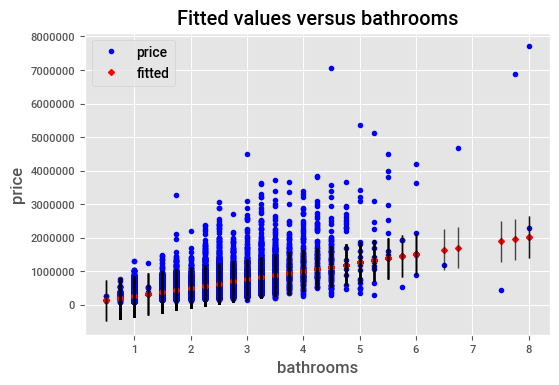

In [47]:
# Model visualization
sm.graphics.plot_fit(results, 'bathrooms')
plt.show()

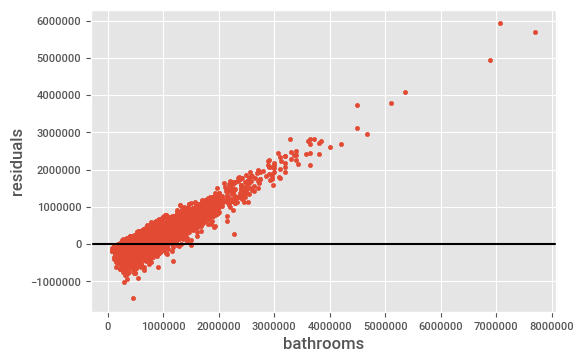

In [48]:
# Residuals
fig, ax = plt.subplots()
ax.scatter(df['price'], results.resid)
ax.axhline(y=0, color='black')
ax.set_xlabel('bathrooms')
ax.set_ylabel('residuals');

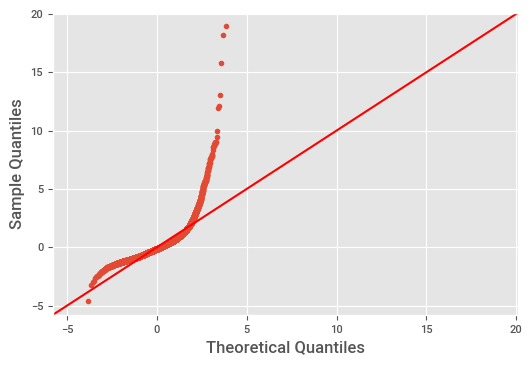

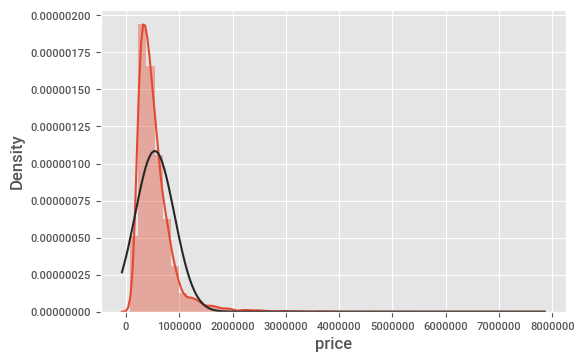

In [50]:
from scipy.stats import norm 
sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit = True)
plt.show()
sns.distplot(df.price, fit=norm);

In [51]:
# Transform data
df.log_price = np.log(df['price'])

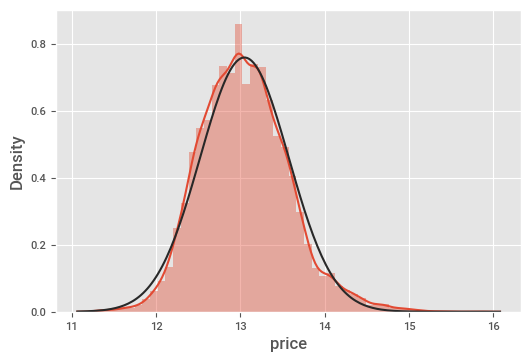

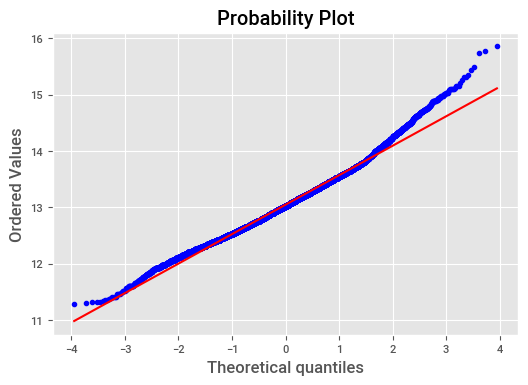

In [52]:
sns.distplot(df.log_price, fit=norm);
fig = plt.figure()
r = stats.probplot(df.log_price, plot=plt)

In [54]:
# multiple regression
df_all = df.drop('price',axis = 1).select_dtypes('number')

model_mult = sm.OLS(y, sm.add_constant(df_all))
results_mult = model_mult.fit()

print(results_mult.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     2131.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:24:16   Log-Likelihood:            -2.4179e+05
No. Observations:               17704   AIC:                         4.836e+05
Df Residuals:                   17685   BIC:                         4.838e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.901e+06   3.33e+06      1.773

In [55]:
# Mean Absolute Error
print('Mean absolute error =', results_mult.resid.abs().sum()/len(y))

Mean absolute error = 128058.10462403092


In [56]:
results_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     2131.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:25:45   Log-Likelihood:            -2.4179e+05
No. Observations:               17704   AIC:                         4.836e+05
Df Residuals:                   17685   BIC:                         4.838e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.901e+06   3.33e+06      1.773      0.076   -6.21e+05    1.24e+07
id            -1.245e-06   5.48e-07     -2.273      0.023   -2.32e-06   -1.71e-07
bedrooms      -3.873e+04   2132.234    -18.166      0.000   -4.29e+04   -3.46e+04
bathrooms      4.333e+04   3696.332     11.724      0.000    3.61e+04    5.06e+04
sqft_living     150.3251      4.960     30.308      0.000     140.603     160.047
sqft_lot          0.0614      0.054      1.146      0.252      -0.044       0.167
floors         3353.8744   4088.933      0.820      0.412   -4660.835    1.14e+04
waterfront     5188.2849   2478.088      2.094      0.036     330.989       1e+04
view            8.06e+04   2262.774     35.618      0.000    7.62e+04     8.5e+04
condition      2.682e+04   2664.088     10.067      0.000    2.16e+04     3.2e+04
grade          9.235e+04   2463.186     37.491      0.000    8.75e+04    9.72e+04
sqft_above       41.8836      4.919      8.514      0.000      32.241      51.526
yr_built      -2591.9508     82.458    -31.433      0.000   -2753.577   -2430.324
yr_renovated     28.7029      4.155      6.908      0.000      20.558      36.848
zipcode        -588.7445     37.344    -15.765      0.000    -661.943    -515.547
lat            6.013e+05   1.22e+04     49.438      0.000    5.77e+05    6.25e+05
long          -2.266e+05   1.49e+04    -15.187      0.000   -2.56e+05   -1.97e+05
sqft_living15    15.6801      3.930      3.990      0.000       7.977      23.384
sqft_lot15       -0.3177      0.082     -3.867      0.000      -0.479      -0.157
==============================================================================
Omnibus:                    15817.895   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1729978.240
Skew:                           3.850   Prob(JB):                         0.00
Kurtosis:                      50.811   Cond. No.                     1.16e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Recommendation
I recommend building average houses since it is what majority can afford hence a bigger market
I also recommend last model because it has a higher r squared value of 0.684, which means it has a 68% model accuracy.
